In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# le dataset (changing decimals to . from , at same tilme)
df = pd.read_csv('ozone.txt', sep=";", decimal=',')
df.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec


<AxesSubplot:>

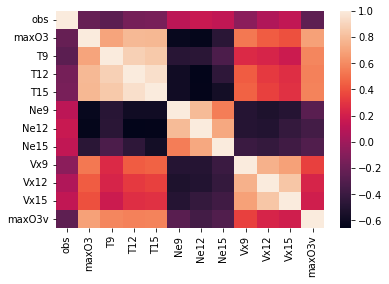

In [3]:
#heatmap
import seaborn as sns
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

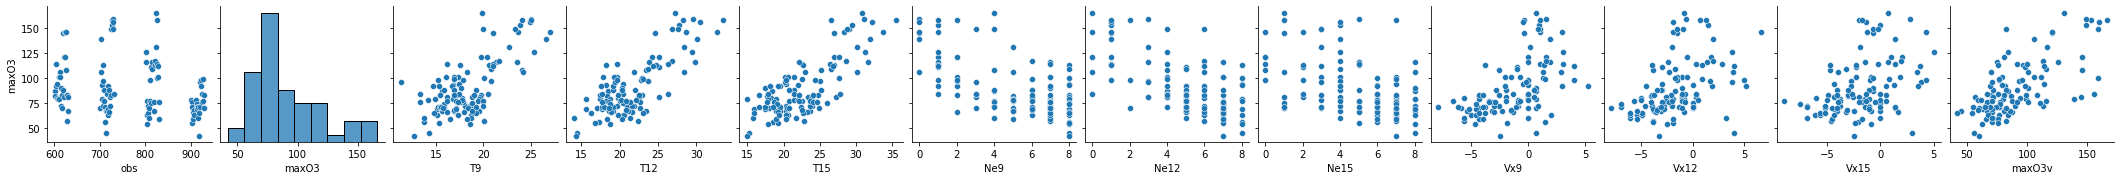

In [4]:
sns.pairplot(df, y_vars=['maxO3'])

<AxesSubplot:xlabel='pluie', ylabel='maxO3'>

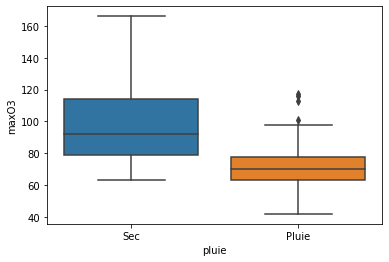

In [5]:
#for catagorical data
sns.boxplot(data=df, y='maxO3', x='pluie')

In [ ]:
##class analysis - see doc on smf.ols to help choose the variables ####
#lrs = smf.ols('maxO3'-'T12'+'Ne9'+ etc etc (needs import)
#and .aic method (?)


In [6]:
# matrice X
X = df.drop('maxO3', axis=1)
X.head()

,obs,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec


In [7]:
# vecteur y
y = df.maxO3
y.head()

0     87
1     82
2     92
3    114
4     94
Name: maxO3, dtype: int64

In [8]:
df.pluie.value_counts()

Sec      69
Pluie    43
Name: pluie, dtype: int64

In [9]:
# get_dummies for vent and pluie
X = pd.get_dummies(data=X, columns=['vent', 'pluie'], drop_first=True)
#X = pd.concat([X.drop(['vent', 'pluie'], axis=1), dummy], axis=1)
X.head()

,obs,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent_Nord,vent_Ouest,vent_Sud,pluie_Sec
0,601,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,1,0,0,1
1,602,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,1,0,0,1
2,603,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,0,0,0,1
3,604,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,1,0,0,1
4,605,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,0,1,0,1


In [10]:
# vérifier les tailles
X.shape, y.shape

((112, 15), (112,))

In [11]:
#Création des échantillons de test et d'entraînement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((102, 15), (10, 15), (102,), (10,))

In [12]:
#scikit learn model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# évaluation R2
sc_train = lr.score(X_train, y_train)
sc_test = lr.score(X_test, y_test)
print(f"{sc_train=} et {sc_test=}")

sc_train=0.7790652494663795 et sc_test=0.5032045277137367


In [14]:
# évaluation RMSE
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, lr.predict(X_train), squared=False)
mse_test = mean_squared_error(y_test, lr.predict(X_test), squared=False)
print(f"{mse_train=} et {mse_test=}")

mse_train=13.525955476121968 et mse_test=13.075822335212434


In [15]:
# prédictions
pred = pd.DataFrame()
pred['y_true'] = y_test
pred['y_pred'] = lr.predict(X_test)
#pred['erreur_absolue'] = abs(pred['y_true'] - pred['y_pred'])
pred

,y_true,y_pred
2,92,87.145702
94,78,76.399619
102,71,66.175200
77,131,119.726540
111,70,75.327845
89,71,59.880137
27,70,89.634678
8,101,87.013484
74,76,76.241098
45,92,63.715063


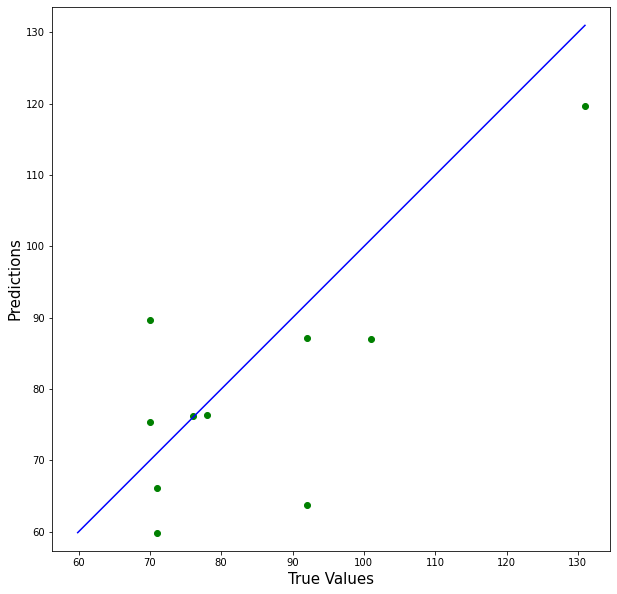

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(pred.y_true, pred.y_pred, c='green')

p1 = max(max(pred.y_true), max(pred.y_pred))
p2 = min(min(pred.y_true), min(pred.y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [18]:
#using Statsmodel
from statsmodels.api import OLS, add_constant
lr2 = OLS(y_train, add_constant(X_train))
res = lr2.fit()
res.summary() #evaluation

C:\Users\catri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\catri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\catri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxO3   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     20.22
Date:                Tue, 10 May 2022   Prob (F-statistic):           4.97e-22
Time:                        14:51:21   Log-Likelihood:                -410.40
No. Observations:                 102   AIC:                             852.8
Df Residuals:                      86   BIC:                             894.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1845     21.372      1.225      0.224     -16.302      68.671
obs           -0.0143      0.017     -0.853      0.396      -0.047       0.019
T9            -0.0577      1.330     -0.043      0.965      -2.702       2.586
T12            1.6838      1.597      1.055      0.295      -1.490       4.858
T15            0.8002      1.253      0.639      0.525      -1.690       3.290
Ne9           -1.9505      1.094     -1.782      0.078      -4.126       0.225
Ne12          -0.9332      1.520     -0.614      0.541      -3.955       2.089
Ne15           0.3040      1.091      0.278      0.781      -1.866       2.474
Vx9            0.3598      1.115      0.323      0.748      -1.856       2.575
Vx12           0.9635      1.397      0.689      0.492      -1.814       3.741
Vx15           0.9434      1.054      0.896      0.373      -1.151       3.038
maxO3v         0.3360      0.073      4.634      0.000       0.192       0.480
vent_Nord      2.0126      7.560      0.266      0.791     -13.016      17.041
vent_Ouest     9.0260      9.353      0.965      0.337      -9.566      27.618
vent_Sud       8.7375      7.940      1.100      0.274      -7.047      24.522
pluie_Sec      1.6358      3.974      0.412      0.682      -6.263       9.535
==============================================================================
Omnibus:                        6.766   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.034   Jarque-Bera (JB):               12.005
Skew:                           0.026   Prob(JB):                      0.00247
Kurtosis:                       4.680   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# predictions
res.predict(add_constant(X_test))

C:\Users\catri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


2       87.145702
94      76.399619
102     66.175200
77     119.726540
111     75.327845
89      59.880137
27      89.634678
8       87.013484
74      76.241098
45      63.715063
dtype: float64

In [20]:
X.head()

,obs,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent_Nord,vent_Ouest,vent_Sud,pluie_Sec
0,601,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,1,0,0,1
1,602,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,1,0,0,1
2,603,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,0,0,0,1
3,604,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,1,0,0,1
4,605,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,0,1,0,1


IndexError: index 21 is out of bounds for axis 0 with size 10

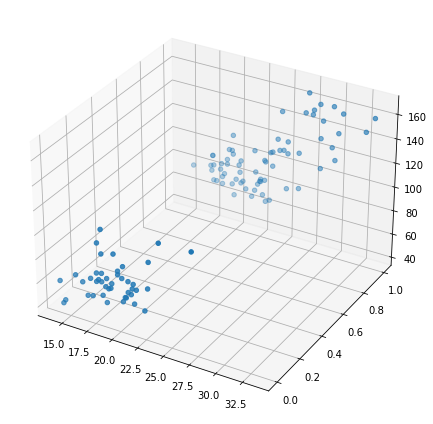

In [21]:
#3D plotting
from mpl_toolkits.mplot3d import Axes3D
x1 = X['T12']
x2 = X['pluie_Sec']
#test = np.array([y])
#test = test.reshape(1, -1)
#pred = lr.predict(test)

fig = plt.figure(figsize=(25,25))

ax1 = fig.add_subplot(131, projection='3d')

ax1.scatter(x1, x2, y)
ax1.plot_trisurf(x1, x2, pred, facecolor='green', alpha=0.5)

plt.show()

In [ ]:
## 2nd method with mean values to make GUI #####

In [24]:
#creating new table with means for multi value variables
df2 = pd.read_csv('ozone.txt', sep=";", decimal=',')

temps = df2.loc[: , "T9":"T15"]
df2['temp_mean'] = temps.mean(axis=1)
Nuag = df2.loc[: , "Ne9":"Ne15"]
df2['neb_mean'] = Nuag.mean(axis=1)
vents = df2.loc[: , "Vx9":"Vx15"]
df2['vent_mean'] = vents.mean(axis=1)
#.drop('maxO3', axis=1)
df_means = df2.drop(['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15'], axis=1)

df_means = pd.get_dummies(data=df_means, columns=['vent', 'pluie'], drop_first=True)

df_means.head()


,obs,maxO3,maxO3v,temp_mean,neb_mean,vent_mean,vent_Nord,vent_Ouest,vent_Sud,pluie_Sec
0,601,87,84,17.500000,5.333333,-0.570033,1,0,0,1
1,602,82,87,17.700000,5.666667,-3.776700,1,0,0,1
2,603,92,82,17.466667,3.666667,1.784900,0,0,0,1
3,604,114,92,19.466667,0.666667,0.386167,1,0,0,1
4,605,94,114,19.433333,7.666667,-2.594833,0,1,0,1


<AxesSubplot:>

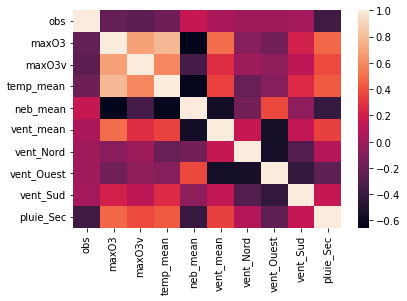

In [25]:
corr2 = df_means.corr()

# plot the heatmap
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns)


In [27]:
#making a regression GUI for obs(date) and neb_mean (clouds)
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Xn = df_means[['maxO3v','temp_mean']]
Yn = df_means.maxO3

regr = LinearRegression()
regr.fit(Xn, Yn)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_old label and input box
label1 = tk.Label(root, text='Type old O3: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_temp label and input box
label2 = tk.Label(root, text=' Type mean temp: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_date #our 1st input variable
    New_date = float(entry1.get()) 
    
    global New_cloud #our 2nd input variable
    New_cloud = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Max O3: ', regr.predict([[New_date,New_cloud]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Max O3',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df_means['maxO3v'].astype(float),df_means['maxO3'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
#ax3.legend(['Max O3']) 
ax3.set_xlabel('old maxO3')
ax3.set_title('old vs current maxO3')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df_means['temp_mean'].astype(float),df_means['maxO3'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
#ax4.legend(['Max 03']) 
ax4.set_xlabel('mean temp')
ax4.set_title('temp vs maxO3')

root.mainloop()


Intercept: 
 -31.539064080448796
Coefficients: 
 [0.33821427 4.37702112]
